## Classifier diagnosing patients.
Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients.

In [89]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [90]:
from sklearn.model_selection import train_test_split

In [109]:
import matplotlib.pyplot as plt

In [91]:
data = load_breast_cancer()

In [92]:
# data is a Bunch object similar to a dictionary
type(data)

sklearn.utils._bunch.Bunch

In [93]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Number of features in the dataset

In [94]:
# printing number of features
print(len(data['feature_names']))

30


In [95]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [96]:
type(data['data'])

numpy.ndarray

### Creating a dataframe out of the dataset

In [97]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [98]:
df['target'] = data['target']

In [99]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [100]:
# shape of the df would be (569, 31)
df.shape

(569, 31)

### Class distribution of malignant vs benign
Instances of `malignant` (encoded 0) and how many `benign` (encoded 1)

In [101]:
# making a frequency table using value_counts() function
dist = df['target'].value_counts()

In [102]:
# ranaming 0 to malignant and 1 to benign
dist = dist.rename({0: 'malignant', 1: 'benign'})

In [103]:
dist

benign       357
malignant    212
Name: target, dtype: int64

### Splitting the data into X and y

In [104]:
# y stored a series of the target variable
y = df['target']

In [105]:
# X stores all the features, df
X = df.drop('target', axis=1)

### Splitting X and y for training and testing data

In [43]:
# setting the seed as 0 to make results reproducible
random_state = 0

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

In [45]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

426 143 426 143


### Building a ML model using the KNN classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# setting number of neighbors to 1
n_neighbors = 1

In [48]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [50]:
knn.fit(X_train, y_train);

#### Predicting class label for the mean value for each feature

In [76]:
# getting the means
means = X.mean()

In [77]:
# getting just the values (array) and reshaping the array
#means = means.values.reshape(1, -1)

In [80]:
# converting series to df
means_pd = pd.DataFrame(means)

In [81]:
# transposing the df
means_pd = means_pd.T

In [84]:
# actualy predicting using the model
knn.predict(means_pd)

array([1])

#### Predicting class label for the test set and finding out the score

In [87]:
# predicting
test_predictions = knn.predict(X_test)

In [106]:
# getting accuracy
accuracy_testing = knn.score(X_test, y_test)
accuracy_testing

0.916083916083916

In [107]:
accuracy_training = knn.score(X_train, y_train)
accuracy_training

1.0

### Accuracy Visualizations

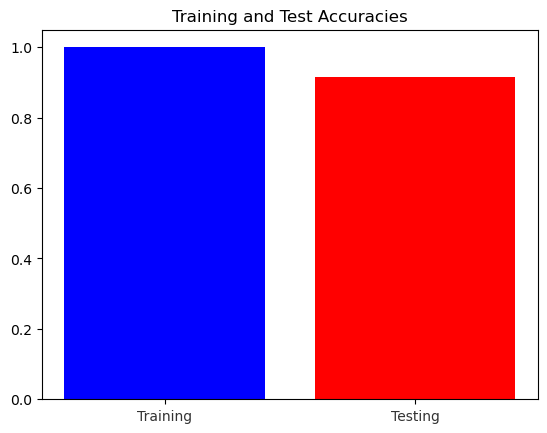

In [148]:
plt.xticks(range(2), ['Training', 'Testing'], alpha=0.8);
plt.title('Training and Test Accuracies')

plt.bar([0,1], (accuracy_training, accuracy_testing), color=['blue', 'red']);

In [130]:
# separating benign and malignant
train_X_mal = X_train[y_train==0]
train_y_mal = y_train[y_train==0]
test_X_mal = X_test[y_test==0]
test_y_mal = y_test[y_test==0]

train_X_ben = X_train[y_train==1]
train_y_ben = y_train[y_train==1]
test_X_ben = X_test[y_test==1]
test_y_ben = y_test[y_test==1]

In [131]:
scores = [knn.score(train_X_mal, train_y_mal), knn.score(train_X_ben, train_y_ben) , knn.score(test_X_mal, test_y_mal), knn.score(test_X_ben, test_y_ben)]

In [132]:
scores

[1.0, 1.0, 0.8679245283018868, 0.9444444444444444]

In [ ]:
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2),
                 ha='center', color='w', fontsize=11)

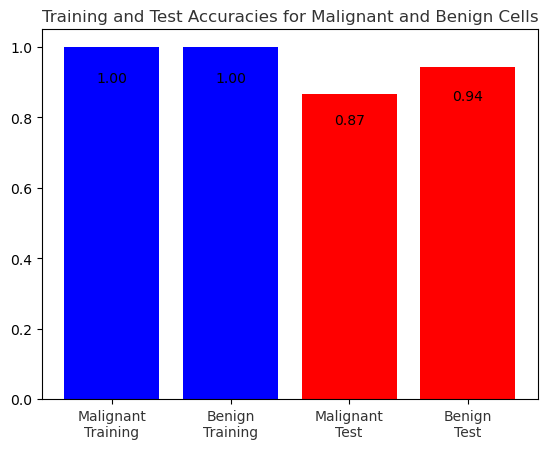

In [145]:
bars = plt.bar(range(4), scores, color=['blue','blue','red','red']);

for b in bars:
    h = b.get_height()
    # print(b)
    plt.gca().text(b.get_x() + b.get_width()/2, h*.90, '{0:.{1}f}'.format(h, 2), ha='center')

plt.xticks(range(4), ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
plt.title('Training and Test Accuracies for Malignant and Benign Cells')

plt.plot();